In [1]:
import matplotlib.pyplot as plt
import numpy as np
from decimal import Decimal

In [2]:
N = 100

In [3]:
# BNB fund amount
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')
PRICE = Decimal('0.0021111')

# assume fee is 1%
fee_assume = Decimal('.01')
# fee in real:
fee_real = Decimal('.00075')

A_LIMIT = Decimal('.01')
B_LIMIT = Decimal('.0001')

In [4]:
def buy():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT
    # buy A sell B:
#     print("buy with price {}".format(PRICE))
    sell_amount_B = B_FUND_AMOUNT - (B_FUND_AMOUNT % B_LIMIT)
    
    cost = (sell_amount_B * fee_real) / PRICE

    B_FUND_AMOUNT -= sell_amount_B
    A_FUND_AMOUNT += (sell_amount_B / PRICE - cost)

In [5]:
def sell():
    global PRICE, A_FUND_AMOUNT, B_FUND_AMOUNT
    # buy B sell A:
#     print("sell with price {}".format(PRICE))
    sell_amount_A = A_FUND_AMOUNT - (A_FUND_AMOUNT % A_LIMIT)

    cost = sell_amount_A * fee_real * PRICE

    A_FUND_AMOUNT -= sell_amount_A
    B_FUND_AMOUNT += (sell_amount_A * PRICE - cost)

In [6]:
A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []
for i in range(N):
    PRICE = PRICE / (Decimal('1.0') - fee_assume)
    PRICE_LIST.append(PRICE)
    sell()
    A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
    B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

    PRICE = PRICE * (Decimal('1.0') - fee_assume)
    PRICE_LIST.append(PRICE)
    buy()
    A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
    B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

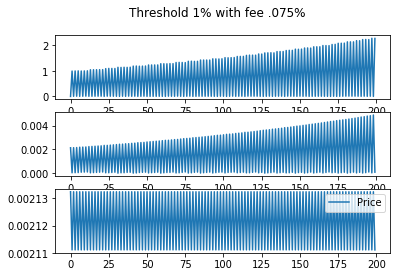

In [7]:
fig, axs = plt.subplots(3)
fig.suptitle('Threshold 1% with fee .075%')
axs[0].plot(A_FUND_AMOUNT_LIST, label='A Amount')
axs[1].plot(B_FUND_AMOUNT_LIST, label='B Amount')
axs[2].plot(PRICE_LIST, label='Price')

plt.legend()
plt.show()

In [8]:
fig.savefig('visualization/figures/strategy_01_threshold_1%.png')

# Reduce threshold fee into .1%

In [9]:
# assume fee is 1%
fee_assume = Decimal('.001')

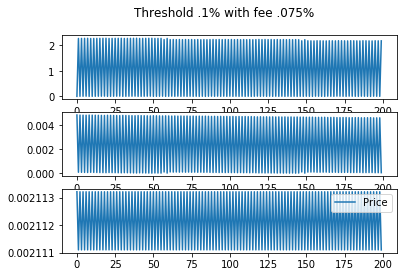

In [10]:
A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []
for i in range(N):
    PRICE = PRICE / (1 - fee_assume)
    PRICE_LIST.append(PRICE)
    sell()
    A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
    B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

    PRICE = PRICE * (1 - fee_assume)
    PRICE_LIST.append(PRICE)
    buy()
    A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
    B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
    
    
fig, axs = plt.subplots(3)
fig.suptitle('Threshold .1% with fee .075%')
axs[0].plot( A_FUND_AMOUNT_LIST, label='A Amount')
axs[1].plot( B_FUND_AMOUNT_LIST, label='B Amount')
axs[2].plot( PRICE_LIST, label='Price')

plt.legend()
plt.show()

In [11]:
fig.savefig('visualization/figures/strategy_01_threshold_.1%.png')

# Testing Strategy with real data (10 days) with threshold 1%
### 2019-09-07 21:14:00 ->   2019-09-17 23:09:00

In [12]:
test_file = '/home/nam/data/ccxt/100_days_1m.csv'

In [13]:
import pandas as pd
df = pd.read_csv(test_file)
Close_lst = df.Close.values

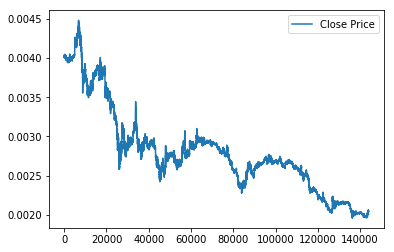

In [14]:
plt.plot(Close_lst, label='Close Price')
plt.legend()
plt.show()

In [15]:
fee_assume = Decimal('0.01')
A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []
PRICE = Decimal(str(Close_lst[0]))
for NEW_PRICE in Close_lst[1:]:
    NEW_PRICE = Decimal(str(NEW_PRICE))
    if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        sell()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
    elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        buy()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

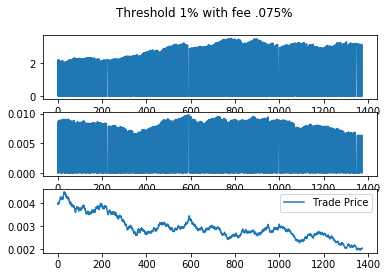

In [16]:
fig, axs = plt.subplots(3)
fig.suptitle('Threshold 1% with fee .075%')
axs[0].plot( A_FUND_AMOUNT_LIST, label='A Amount')
axs[1].plot( B_FUND_AMOUNT_LIST, label='B Amount')
axs[2].plot( PRICE_LIST, label='Trade Price')

plt.legend()
plt.show()

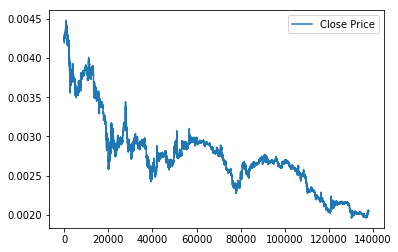

In [17]:
IDX_SPLIT = 6000
Close_lst = Close_lst[IDX_SPLIT:]
plt.plot(Close_lst, label='Close Price')
plt.legend()
plt.show()

In [18]:
fee_assume = Decimal('0.01')
A_FUND_AMOUNT_LIST = []
B_FUND_AMOUNT_LIST = []
PRICE_LIST = []
PRICE = Decimal(str(Close_lst[0]))
for NEW_PRICE in Close_lst[1:]:
    NEW_PRICE = Decimal(str(NEW_PRICE))
    if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        sell()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
    elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume):
        PRICE = NEW_PRICE
        PRICE_LIST.append(PRICE)
        buy()
        A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
        B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)

No handles with labels found to put in legend.


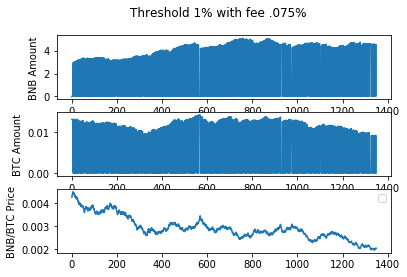

In [19]:
fig, axs = plt.subplots(3)
fig.suptitle('Threshold 1% with fee .075%')
# axs[0].plot( A_FUND_AMOUNT_LIST, label='A Amount')
axs[0].plot( A_FUND_AMOUNT_LIST)
axs[0].set_ylabel('BNB Amount')
axs[1].plot( B_FUND_AMOUNT_LIST)
axs[1].set_ylabel('BTC Amount')
axs[2].plot( PRICE_LIST)
axs[2].set_ylabel('BNB/BTC Price')

plt.legend()
plt.show()

# Modify threshold and compare

In [20]:
def modify_threshold(threshold = .01):
    global fee_assume, A_FUND_AMOUNT, B_FUND_AMOUNT, Close_lst
    global A_FUND_AMOUNT_LIST, B_FUND_AMOUNT_LIST, PRICE
    fee_assume = Decimal(str(threshold))
    A_FUND_AMOUNT_LIST = []
    B_FUND_AMOUNT_LIST = []
    PRICE_LIST = []
    PRICE = Decimal(str(Close_lst[0]))
    PREV_SIDE = "buy" 
    for NEW_PRICE in Close_lst[1:]:
        NEW_PRICE = Decimal(str(NEW_PRICE))
        if NEW_PRICE > PRICE / (Decimal('1.0') - fee_assume) and PREV_SIDE == "buy":
            PRICE = NEW_PRICE
            PRICE_LIST.append(PRICE)
            sell()
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            PREV_SIDE = "sell"
        elif NEW_PRICE < PRICE * (Decimal('1.0') - fee_assume) and PREV_SIDE == "sell":
            PRICE = NEW_PRICE
            PRICE_LIST.append(PRICE)
            buy()
            A_FUND_AMOUNT_LIST.append(A_FUND_AMOUNT)
            B_FUND_AMOUNT_LIST.append(B_FUND_AMOUNT)
            PREV_SIDE = "buy"

In [21]:
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

modify_threshold(threshold=.001)
print(A_FUND_AMOUNT_LIST[-1])
print(B_FUND_AMOUNT_LIST[-1])

1.001517802459538551336477682
0.000001213532500000979265000000


In [22]:
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

modify_threshold(threshold=.02)
print(A_FUND_AMOUNT_LIST[-1])
print(B_FUND_AMOUNT_LIST[-1])

1.053952715815908095255847938
0.000031987729499998980765000000


In [23]:
df = pd.read_csv(test_file)
Close_lst = df.Close.values
A_FUND_AMOUNT = Decimal('1.0')
# BTC fund amount
B_FUND_AMOUNT = Decimal('0.0')

modify_threshold(threshold=.1)
print(A_FUND_AMOUNT_LIST[-1])
print(B_FUND_AMOUNT_LIST[-1])

1.092619284294234592445328031
0.00007094427500000049962500
